In [25]:
import open3d as o3d
import matplotlib.pyplot as plt
import numpy as np
import cv2
import sys
import os
#move to parent directory (where the utils file is)
sys.path.append("..")
from utils import get_img_simple

In [26]:
dillo_pcd = o3d.data.ArmadilloMesh()
pcd_path = dillo_pcd.path
pcd = o3d.io.read_point_cloud(pcd_path)
# rotate the armadillo to face forwards
R = pcd.get_rotation_matrix_from_xyz((0, np.pi, 0))
pcd.rotate(R, center=pcd.get_center())

PointCloud with 172974 points.

In [27]:
# Downsample
pcd_down =  pcd.voxel_down_sample(voxel_size=1)

# Convex hull
hull, _ = pcd_down.compute_convex_hull()
hull_ls = o3d.geometry.LineSet.create_from_triangle_mesh(hull)

# Hidden point removal
diameter = np.linalg.norm(
    np.asarray(pcd_down.get_max_bound()) - np.asarray(pcd_down.get_min_bound()))
camera = [0, 0, diameter]
_, pt_map = pcd_down.hidden_point_removal(camera, diameter*100)


Plot results

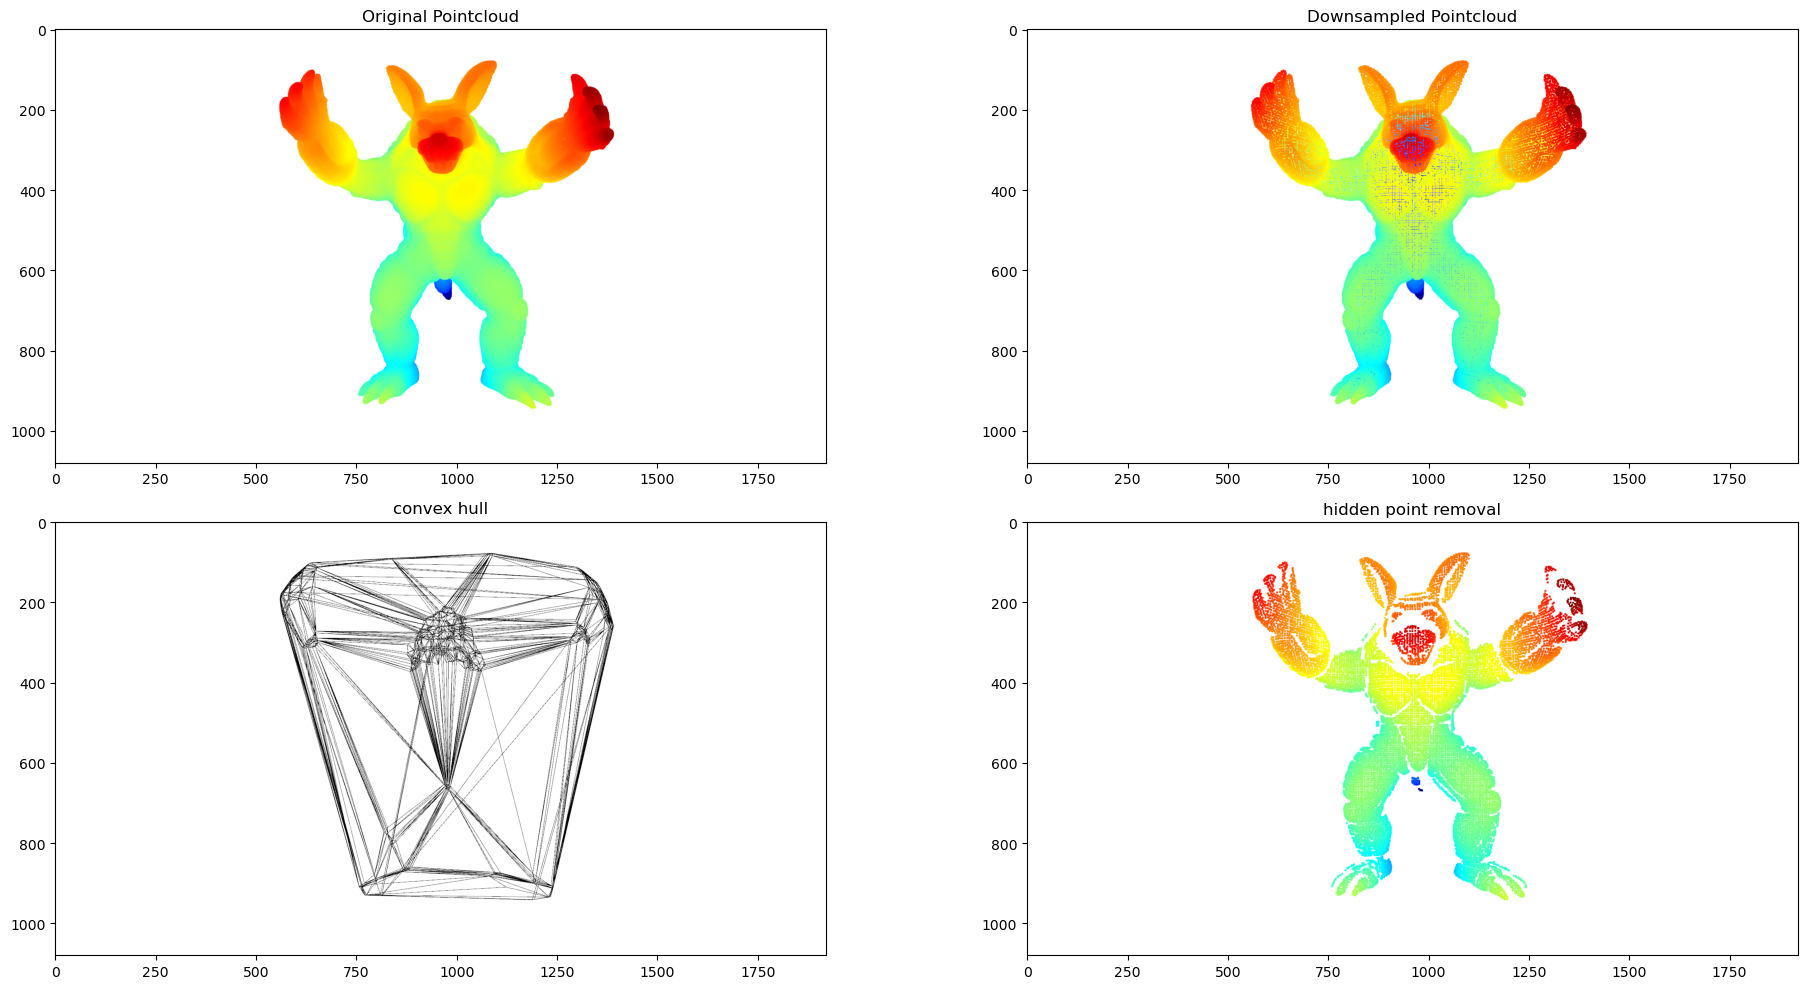

In [28]:
plt.figure(figsize=(20,10))

ax1 = plt.subplot(2, 2, 1)
ax1.imshow(get_img_simple([pcd]))
ax1.set_title('Original Pointcloud')

ax2 = plt.subplot(2, 2, 2)
ax2.imshow(get_img_simple([pcd_down]))
ax2.set_title('Downsampled Pointcloud')

ax3 = plt.subplot(2, 2, 3)
ax3.imshow(get_img_simple([hull_ls]))
ax3.set_title('convex hull')

ax4 = plt.subplot(2, 2, 4)
ax4.imshow(get_img_simple([pcd_down.select_by_index(pt_map)]))
ax4.set_title('hidden point removal')

plt.tight_layout() 
plt.show()
